In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.shape

(404290, 6)

In [4]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


there are 5 input and 1 output column with two questions with their unique question id's and manually labelled isduplicate or not 

In [5]:
new_df = df.sample(60000,random_state=6)

fixing the split and taking small sample 

In [6]:
new_df.isnull().sum()

id              0
qid1            0
qid2            0
question1       0
question2       0
is_duplicate    0
dtype: int64

no null values

In [7]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate
37534,37534,68284,68285,Is it weird that I find Putin attractive?,Is it weird that I have a crush on Vladimir Pu...,0
309101,309101,433030,433031,What is linear programming?,What are advantages of linear programming?,0
397022,397022,530126,530127,Why Indians still think that they are more san...,What is the first thing that comes to your min...,0
322007,322007,355515,212754,Who is the smartest character in The Big Bang ...,Who is your least favorite character from Big ...,0
340381,340381,468097,468098,How much money a deveplor make from apps?,How much money does your app make?,0


In [8]:
new_df.isnull().sum()

id              0
qid1            0
qid2            0
question1       0
question2       0
is_duplicate    0
dtype: int64

In [9]:
new_df.duplicated().sum()

np.int64(0)

no duplicate rows

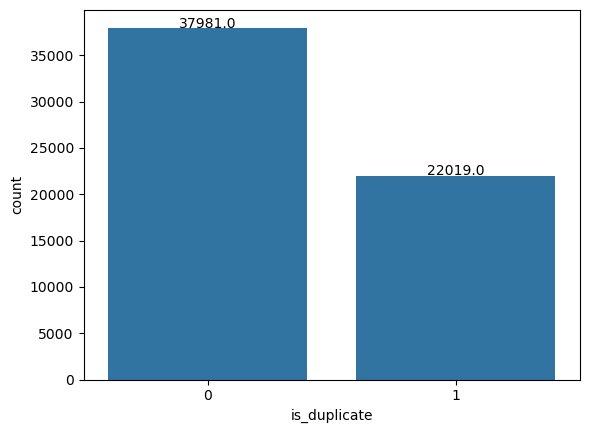

In [10]:
# Checking distribution of duplicate and non-duplicate questions

ax = sns.countplot(x='is_duplicate', data=new_df)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2., height + 10, height, ha="center")  # height + 10 ko isliye use kiya hai taki text bar ke upar dikhai de
plt.show()


this shows selected data have more unique question

In [11]:
# Repeated questions

qid = pd.Series(new_df['qid1'].tolist() + new_df['qid2'].tolist())
print('Number of unique questions',np.unique(qid).shape[0])
x = qid.value_counts()>1
print('Number of questions getting repeated',x[x].shape[0])

Number of unique questions 105210
Number of questions getting repeated 9659


9659 questions are exactly repeated

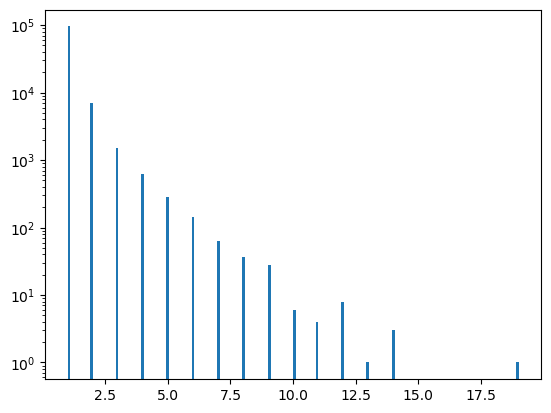

In [12]:
# Repeated questions histogram

plt.hist(qid.value_counts().values,bins=160)
plt.yscale('log')
plt.show()

hm yha pr dekh rhe h ki ek baar , do baar , .... ane wale question kitne hi 

In [13]:
# Feature Engineering

new_df['q1_len'] = new_df['question1'].str.len() 
new_df['q2_len'] = new_df['question2'].str.len()

making a column of length of questions

In [14]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len
37534,37534,68284,68285,Is it weird that I find Putin attractive?,Is it weird that I have a crush on Vladimir Pu...,0,41,50
309101,309101,433030,433031,What is linear programming?,What are advantages of linear programming?,0,27,42
397022,397022,530126,530127,Why Indians still think that they are more san...,What is the first thing that comes to your min...,0,52,142
322007,322007,355515,212754,Who is the smartest character in The Big Bang ...,Who is your least favorite character from Big ...,0,53,79
340381,340381,468097,468098,How much money a deveplor make from apps?,How much money does your app make?,0,41,34


In [15]:
new_df['q1_num_words'] = new_df['question1'].apply(lambda row: len(row.split(" ")))
new_df['q2_num_words'] = new_df['question2'].apply(lambda row: len(row.split(" ")))
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words
37534,37534,68284,68285,Is it weird that I find Putin attractive?,Is it weird that I have a crush on Vladimir Pu...,0,41,50,8,11
309101,309101,433030,433031,What is linear programming?,What are advantages of linear programming?,0,27,42,4,6
397022,397022,530126,530127,Why Indians still think that they are more san...,What is the first thing that comes to your min...,0,52,142,9,26
322007,322007,355515,212754,Who is the smartest character in The Big Bang ...,Who is your least favorite character from Big ...,0,53,79,10,14
340381,340381,468097,468098,How much money a deveplor make from apps?,How much money does your app make?,0,41,34,8,7


making cols of no. of words in each column

In [16]:
def common_words(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))    
    return len(w1 & w2)

In [17]:
new_df['word_common'] = new_df.apply(common_words, axis=1)
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common
37534,37534,68284,68285,Is it weird that I find Putin attractive?,Is it weird that I have a crush on Vladimir Pu...,0,41,50,8,11,5
309101,309101,433030,433031,What is linear programming?,What are advantages of linear programming?,0,27,42,4,6,3
397022,397022,530126,530127,Why Indians still think that they are more san...,What is the first thing that comes to your min...,0,52,142,9,26,2
322007,322007,355515,212754,Who is the smartest character in The Big Bang ...,Who is your least favorite character from Big ...,0,53,79,10,14,6
340381,340381,468097,468098,How much money a deveplor make from apps?,How much money does your app make?,0,41,34,8,7,3


dono questions m jo common words h unko nikaal rhe h 

In [18]:
def total_words(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))    
    return (len(w1) + len(w2))

In [19]:
new_df['word_total'] = new_df.apply(total_words, axis=1)
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total
37534,37534,68284,68285,Is it weird that I find Putin attractive?,Is it weird that I have a crush on Vladimir Pu...,0,41,50,8,11,5,19
309101,309101,433030,433031,What is linear programming?,What are advantages of linear programming?,0,27,42,4,6,3,10
397022,397022,530126,530127,Why Indians still think that they are more san...,What is the first thing that comes to your min...,0,52,142,9,26,2,31
322007,322007,355515,212754,Who is the smartest character in The Big Bang ...,Who is your least favorite character from Big ...,0,53,79,10,14,6,22
340381,340381,468097,468098,How much money a deveplor make from apps?,How much money does your app make?,0,41,34,8,7,3,15


total word jo questions m h usko nikaal rhe h 

In [20]:
new_df['word_share'] = round(new_df['word_common']/new_df['word_total'],2)
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share
37534,37534,68284,68285,Is it weird that I find Putin attractive?,Is it weird that I have a crush on Vladimir Pu...,0,41,50,8,11,5,19,0.26
309101,309101,433030,433031,What is linear programming?,What are advantages of linear programming?,0,27,42,4,6,3,10,0.30
397022,397022,530126,530127,Why Indians still think that they are more san...,What is the first thing that comes to your min...,0,52,142,9,26,2,31,0.06
322007,322007,355515,212754,Who is the smartest character in The Big Bang ...,Who is your least favorite character from Big ...,0,53,79,10,14,6,22,0.27
340381,340381,468097,468098,How much money a deveplor make from apps?,How much money does your app make?,0,41,34,8,7,3,15,0.20


common words ka percentage nikaal rhe h 

### New features ka analysis

minimum characters 1
maximum characters 354
average num of characters 59


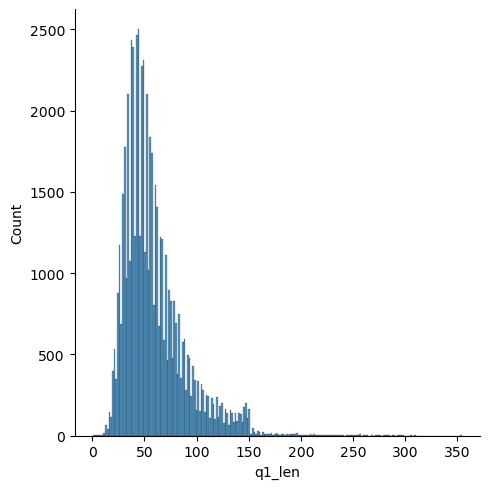

In [21]:
# Analysis of features
sns.displot(new_df['q1_len'])
print('minimum characters',new_df['q1_len'].min())
print('maximum characters',new_df['q1_len'].max())
print('average num of characters',int(new_df['q1_len'].mean()))

question1 m mostly ki length 30 to 70 h

minimum characters 2
maximum characters 1151
average num of characters 60


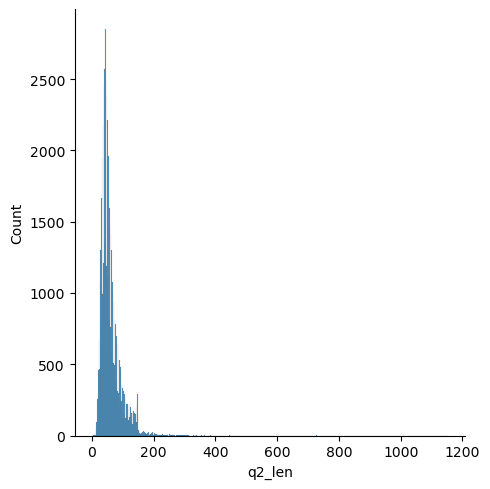

In [22]:
sns.displot(new_df['q2_len'])
print('minimum characters',new_df['q2_len'].min())
print('maximum characters',new_df['q2_len'].max())
print('average num of characters',int(new_df['q2_len'].mean()))

kuchh questions m question2 ki length jyada hai

minimum words 1
maximum words 68
average num of words 10


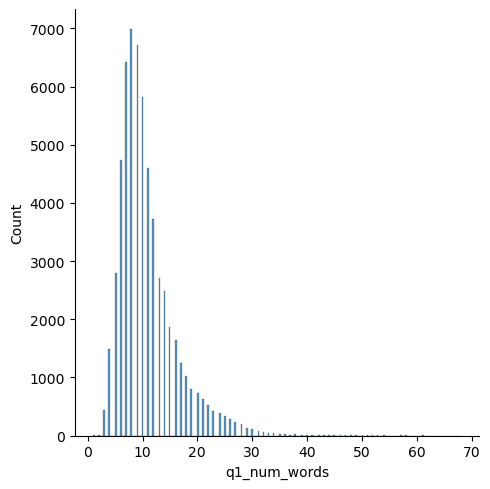

In [23]:
sns.displot(new_df['q1_num_words'])
print('minimum words',new_df['q1_num_words'].min())
print('maximum words',new_df['q1_num_words'].max())
print('average num of words',int(new_df['q1_num_words'].mean()))

mostly question1 m 7 to 12 words h

minimum words 1
maximum words 237
average num of words 11


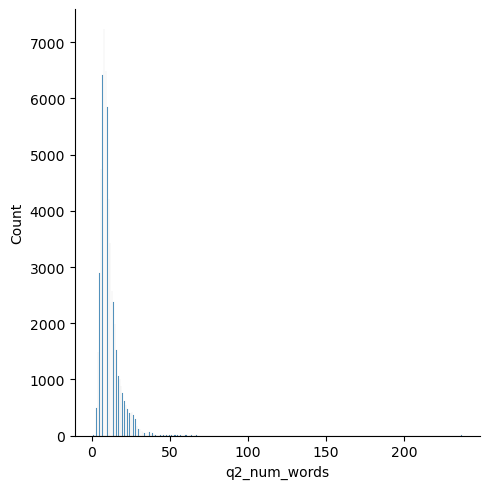

In [24]:
sns.displot(new_df['q2_num_words'])
print('minimum words',new_df['q2_num_words'].min())
print('maximum words',new_df['q2_num_words'].max())
print('average num of words',int(new_df['q2_num_words'].mean()))

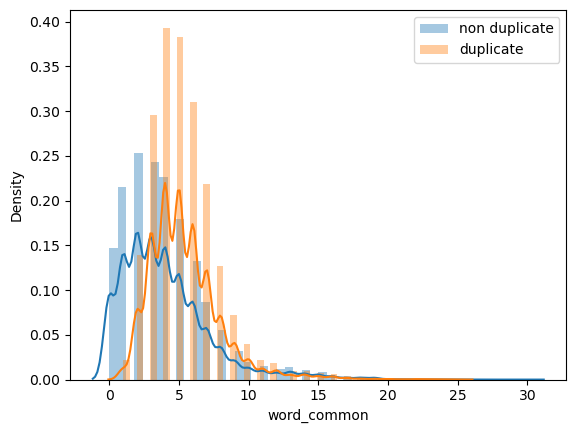

In [25]:
# common words
sns.distplot(new_df[new_df['is_duplicate'] == 0]['word_common'],label='non duplicate') # non-duplicate questions k common words ka distribution
sns.distplot(new_df[new_df['is_duplicate'] == 1]['word_common'],label='duplicate')
plt.legend()
plt.show()

duplicate question m common words jyada h 

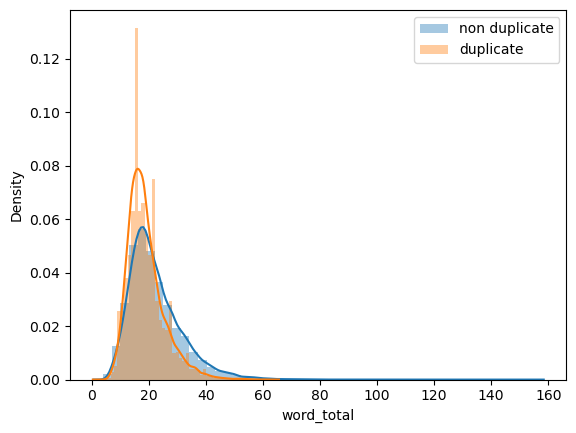

In [26]:
# total words
sns.distplot(new_df[new_df['is_duplicate'] == 0]['word_total'],label='non duplicate')
sns.distplot(new_df[new_df['is_duplicate'] == 1]['word_total'],label='duplicate')
plt.legend()
plt.show()

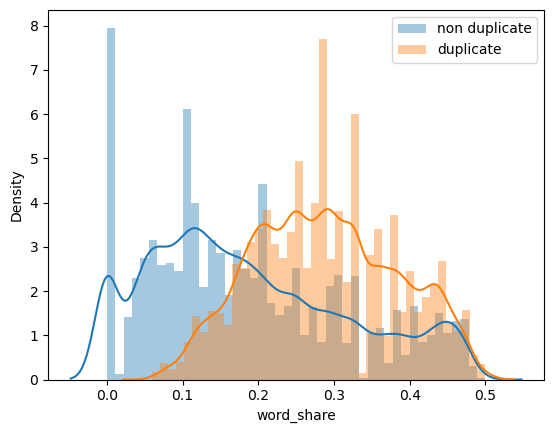

In [27]:
# word share
sns.distplot(new_df[new_df['is_duplicate'] == 0]['word_share'],label='non duplicate')
sns.distplot(new_df[new_df['is_duplicate'] == 1]['word_share'],label='duplicate')
plt.legend()
plt.show()

In [28]:
ques_df = new_df[['question1','question2']]
ques_df.head()

,question1,question2
37534,Is it weird that I find Putin attractive?,Is it weird that I have a crush on Vladimir Pu...
309101,What is linear programming?,What are advantages of linear programming?
397022,Why Indians still think that they are more san...,What is the first thing that comes to your min...
322007,Who is the smartest character in The Big Bang ...,Who is your least favorite character from Big ...
340381,How much money a deveplor make from apps?,How much money does your app make?


In [29]:
final_df = new_df.drop(columns=['id','qid1','qid2','question1','question2'])
print(final_df.shape)
final_df.head()

(60000, 8)


,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share
37534,0,41,50,8,11,5,19,0.26
309101,0,27,42,4,6,3,10,0.30
397022,0,52,142,9,26,2,31,0.06
322007,0,53,79,10,14,6,22,0.27
340381,0,41,34,8,7,3,15,0.20


In [30]:
from sklearn.feature_extraction.text import CountVectorizer
# merge texts
questions = list(ques_df['question1']) + list(ques_df['question2'])

cv = CountVectorizer(max_features=3000)   # limiting to top 3000 features
q1_arr, q2_arr = np.vsplit(cv.fit_transform(questions).toarray(),2) # splitting back into q1 and q2 arrays

In [31]:
temp_df1 = pd.DataFrame(q1_arr, index= ques_df.index)
temp_df2 = pd.DataFrame(q2_arr, index= ques_df.index)
temp_df = pd.concat([temp_df1, temp_df2], axis=1)
temp_df.shape

(60000, 6000)

In [32]:
final_df = pd.concat([final_df, temp_df], axis=1)
print(final_df.shape)
final_df.head()

(60000, 6008)


,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share,0,1,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
37534,0,41,50,8,11,5,19,0.26,0,0,...,0,0,0,0,0,0,0,0,0,0
309101,0,27,42,4,6,3,10,0.30,0,0,...,0,0,0,0,0,0,0,0,0,0
397022,0,52,142,9,26,2,31,0.06,0,0,...,0,1,0,0,2,0,0,0,0,0
322007,0,53,79,10,14,6,22,0.27,0,0,...,0,0,0,0,1,0,0,0,0,0
340381,0,41,34,8,7,3,15,0.20,0,0,...,0,0,0,0,1,0,0,0,0,0


BOW apply krne k baad dono dataframes ko merge kr diye new features bnane k baad

In [33]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(final_df.iloc[:,1:].values,final_df.iloc[:,0].values,test_size=0.2,random_state=1)

In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
accuracy_score(y_test,y_pred)

0.7790833333333333

In [35]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train,y_train)
y_pred = xgb.predict(X_test)
accuracy_score(y_test,y_pred)

0.775